In [1]:

#import libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0


In [4]:
print("Number of instances: %d" % df.shape[0])
print("Number of features: %d" % df.shape[1])

Number of instances: 284807
Number of features: 31


In [5]:

#overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:

#make sure the file loaded correctly
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93140,64267.0,-0.964341,-0.229940,0.046036,-2.011037,-1.682484,-1.227699,-0.727758,0.473547,-2.481839,...,-0.229063,-0.461924,0.406946,0.351600,-0.196886,-0.550796,-0.412084,-0.271395,79.00,0
109709,71503.0,-1.406379,1.193442,0.932727,-1.217894,-0.552076,-1.128438,0.204981,0.143193,0.163657,...,0.016125,-0.201653,0.110593,0.444688,-0.239715,0.659737,-0.647898,0.073977,7.68,0
275812,166737.0,-0.602120,0.270060,1.966301,-1.300851,0.186668,0.337248,0.289900,0.032604,0.332439,...,0.138724,0.539209,-0.056458,0.810841,-0.652830,0.255609,-0.181990,-0.045447,27.99,0
214187,139568.0,-0.577487,0.925316,0.748626,0.946856,0.683667,1.953576,-0.038771,0.990933,-0.071776,...,-0.282241,-0.574569,0.329063,-0.405862,-0.971255,-0.940660,0.188965,0.147997,19.50,0
184078,126082.0,-3.014272,-1.190566,0.707567,1.332643,0.517177,0.036306,-0.062074,0.477474,-0.314711,...,0.080959,1.134878,0.808899,0.810601,0.299753,-0.363421,0.540137,-0.152695,155.30,0
281973,170573.0,1.986161,-0.322584,-0.414636,0.367806,-0.342154,-0.007799,-0.574152,-0.017019,1.244785,...,0.202296,0.880401,0.128475,0.666620,-0.027152,-0.241165,0.049248,-0.027948,9.99,0
90465,63032.0,-2.183576,0.879366,0.632096,1.667149,-4.115619,2.488205,2.163341,0.209461,-0.228950,...,-0.047218,0.698351,-0.779861,0.103005,0.084493,-0.009267,-0.276432,-0.624392,671.00,0
3559,3042.0,-0.686740,-3.373707,-1.315155,0.577998,-1.144627,-0.223411,1.410315,-0.484678,0.145660,...,0.600487,-0.628384,-1.108890,-0.427043,0.126395,1.047753,-0.287424,0.176376,1068.62,0
94363,64847.0,-0.569973,-0.795603,2.225476,-2.489884,-1.206289,0.120992,0.025480,-0.073496,-2.467630,...,0.134460,0.710050,0.058435,0.205622,-0.039193,-0.270876,-0.079703,-0.121909,126.00,0
239667,150212.0,2.123524,-0.358814,-1.500060,-0.618655,-0.427336,-1.572003,-0.135350,-0.384681,-0.996699,...,0.062625,0.245598,0.214240,0.484862,-0.079811,-0.336998,-0.021358,-0.037642,15.00,0


In [7]:

#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


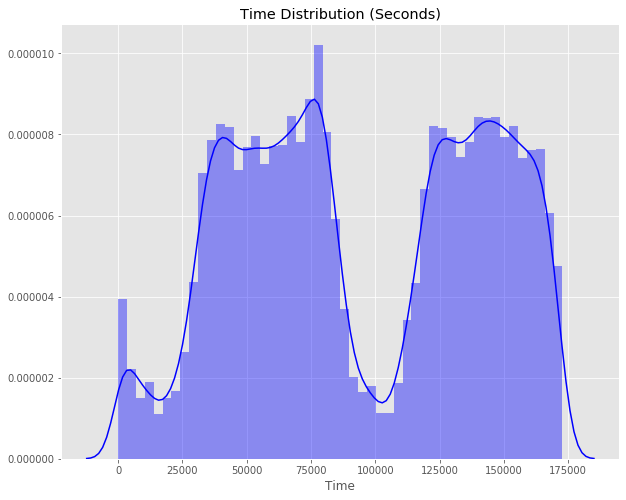

In [8]:
#plot the time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')

sns.distplot(df['Time'],color='blue')

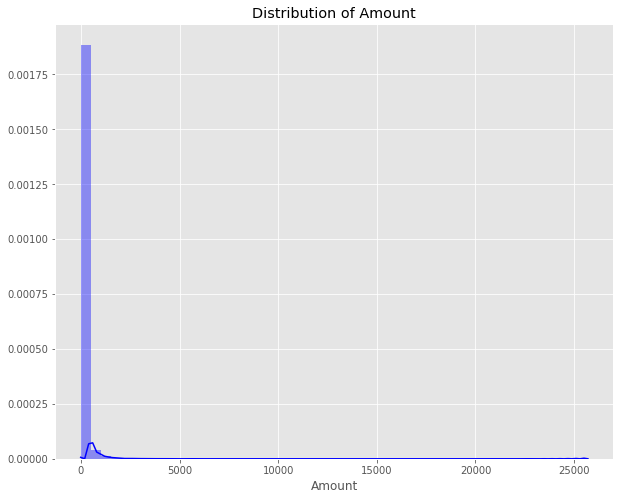

In [9]:

#plot the amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='blue');

In [10]:
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]

print(f'Fraudulent:{fraud}, Non-fraudulent:{nonfraud}')
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudulent:492, Non-fraudulent:284315
Ratio of fraud to non-fraud: 492/284315 (0.173%)


In [11]:
# Missing values
na_perc = {}
for col in df.columns:
    na_perc[col] = df[col].isnull().sum()*100/len(df)
na_perc

{'Time': 0.0,
 'V1': 0.0,
 'V2': 0.0,
 'V3': 0.0,
 'V4': 0.0,
 'V5': 0.0,
 'V6': 0.0,
 'V7': 0.0,
 'V8': 0.0,
 'V9': 0.0,
 'V10': 0.0,
 'V11': 0.0,
 'V12': 0.0,
 'V13': 0.0,
 'V14': 0.0,
 'V15': 0.0,
 'V16': 0.0,
 'V17': 0.0,
 'V18': 0.0,
 'V19': 0.0,
 'V20': 0.0,
 'V21': 0.0,
 'V22': 0.0,
 'V23': 0.0,
 'V24': 0.0,
 'V25': 0.0,
 'V26': 0.0,
 'V27': 0.0,
 'V28': 0.0,
 'Amount': 0.0,
 'Class': 0.0}

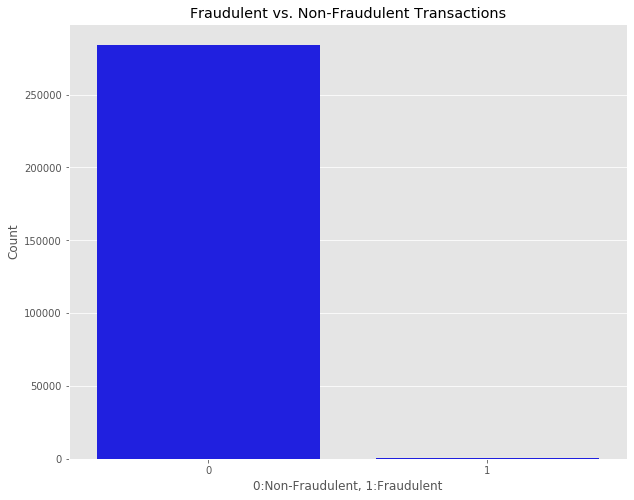

In [12]:

#fraud vs. non-fraud transactions
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent');

Text(0.5, 1, 'Correlation heatmap for the features')

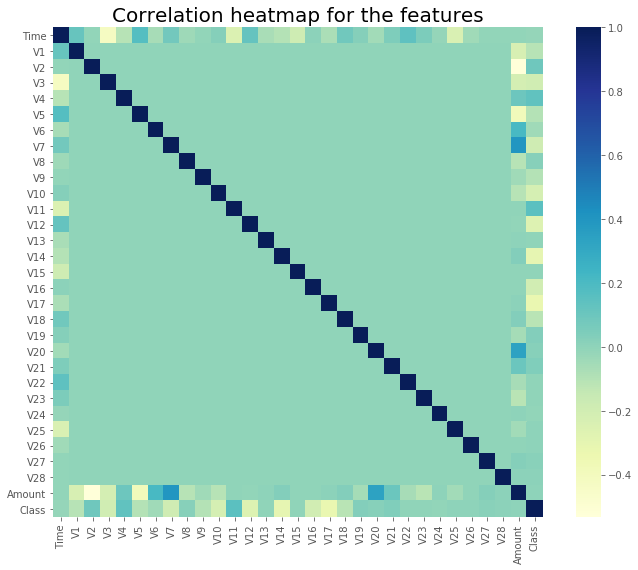

In [13]:
# Feature correlations - ideally should be uncorrelated since they are different components from PCA
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap for the features', fontsize=20)

We can see that Linear correation between PCA is almost 0

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 <a list of 9 Text yticklabel objects>)

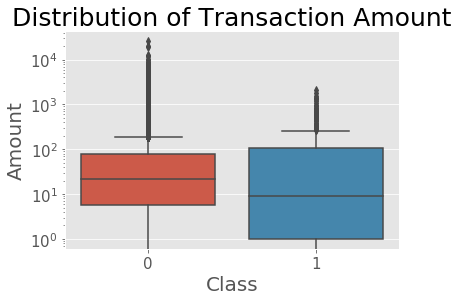

In [14]:

# Analysis of fraud by the total amount spent
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data = df, x = 'Class', y = 'Amount')
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 <a list of 11 Text yticklabel objects>)

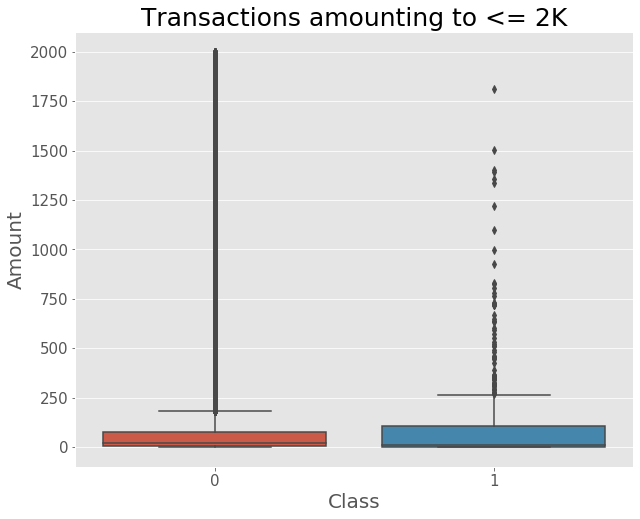

In [15]:
# Transactions less than 2K
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data=df.loc[df.Amount <= 2000,:], x = 'Class', y = 'Amount')
plt.title("Transactions amounting to <= 2K", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)


In [16]:
import datetime
def convert_time(sec):
    return datetime.datetime.fromtimestamp(sec)

df_time = df[['Time','Amount','Class']].copy()
df_time['time'] = df_time.Time.apply(convert_time)
timeDelta = datetime.datetime.utcnow() - datetime.datetime.now() 
df_time['hour'] = df_time.time + timeDelta
df_time['hour'] = df_time.hour.dt.hour
df_time_grouped = df_time.groupby(['hour','Class'])

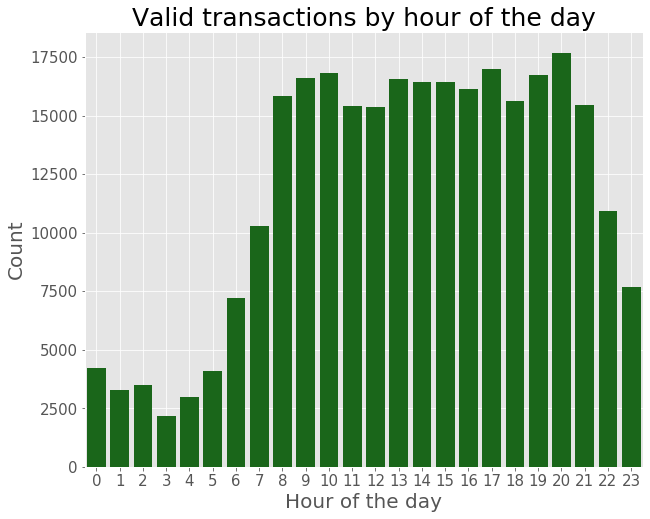

In [21]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = df_time[df_time.Class == 0], x = 'hour', color = 'green',
                 saturation = 0.6)
plt.title("Valid transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day', fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
g.axes.grid('off')

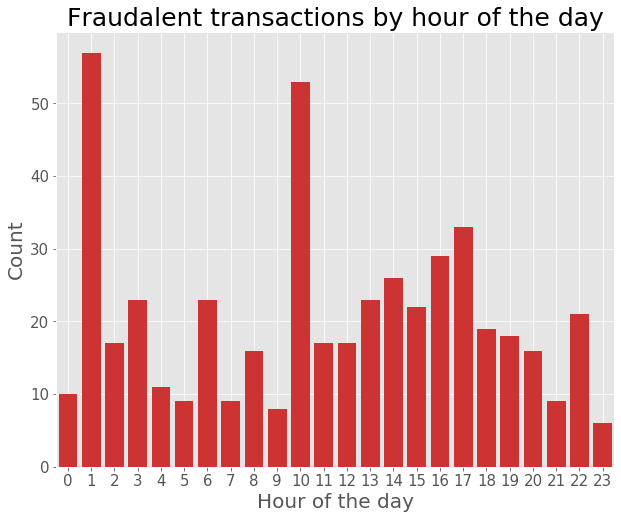

In [22]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = df_time[df_time.Class == 1], x = 'hour', color = 'red',
                 saturation = 0.6)
plt.title("Fraudalent transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day',fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
plt.ylabel('Count')
g.axes.grid('off')

<Figure size 720x576 with 0 Axes>

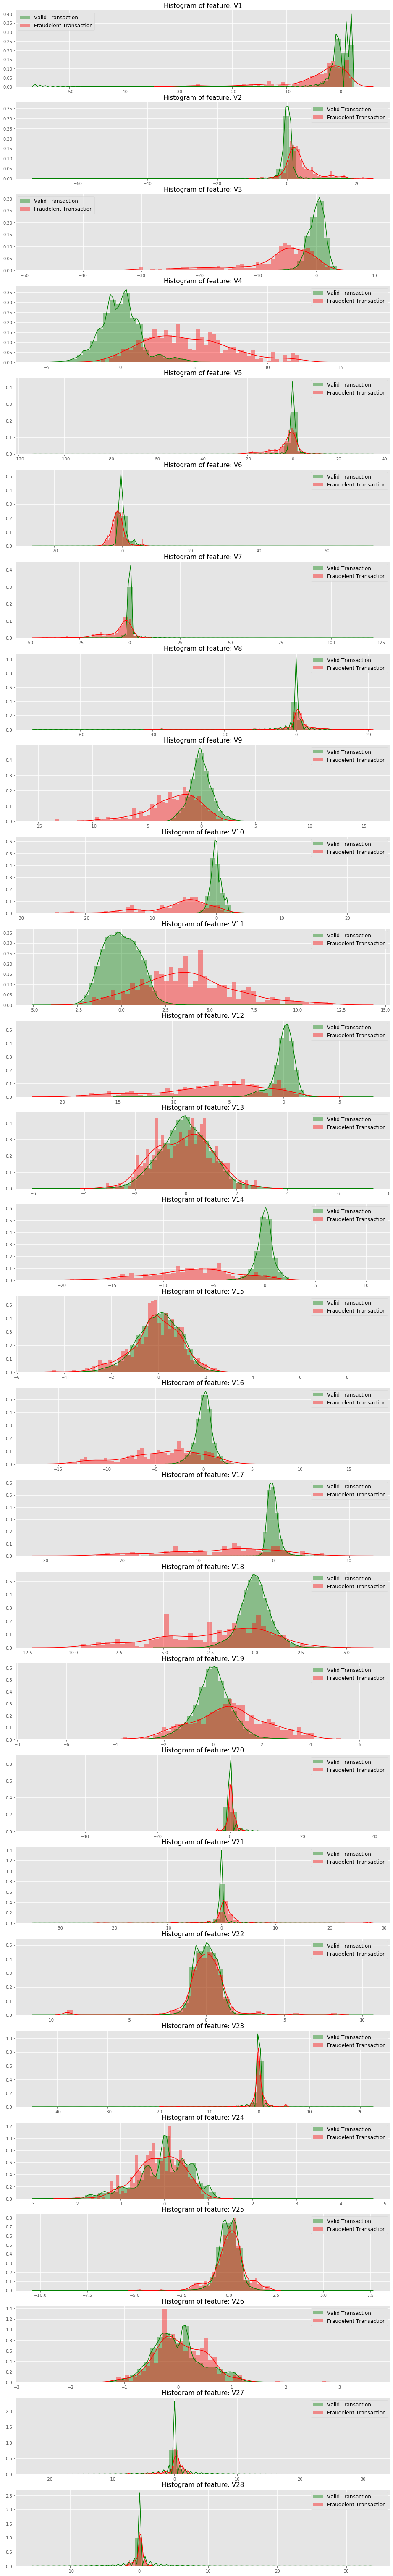

In [24]:
import matplotlib.gridspec as gridspec
plt.clf()
pca_features = df.columns[1:29]
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(df[pca_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 0], bins=50, label='Valid Transaction', color='green')
    sns.distplot(df[col][df.Class == 1], bins=50, label='Fraudelent Transaction', color='red')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(col),fontsize=15)
    plt.legend(loc='best',fontsize=12)
plt.show()

In [25]:

#drop the predicted column
data = df.drop(columns=['Class'])
answer = df['Class']

In [26]:
X_break, X_test, y_break, y_test = train_test_split(data, answer, \
                                                    test_size=0.2, stratify=df['Class'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)
# Initialize fit StandardScaler
std_scale = StandardScaler().fit(X_train)

# Scale data
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)
X_test_std = std_scale.transform(X_test)

In [27]:
#Dealing with imbalanced classes
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train_std,y_train)
X_val_under, y_val_under = RandomUnderSampler(random_state=42).fit_sample(X_val_std,y_val)

# Logistic Regression


In [28]:

# Run CV with 5 folds (logit)

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    3.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

# Naive Bayes

In [29]:

# Fit a Naive Bayes Model

gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

# Random Forest

In [30]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   39.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   39.0s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

# ROC Curve

In [31]:
def roc_scores(X_value, Y_value):
    #in sample
    model_list = [logistic_grid.best_estimator_,  
                  gnb_best,
                  rf_grid.best_estimator_
                 ]

    model_name = ['Logit','Naive Bayes','Random Forest','Dummy']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(20,18))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

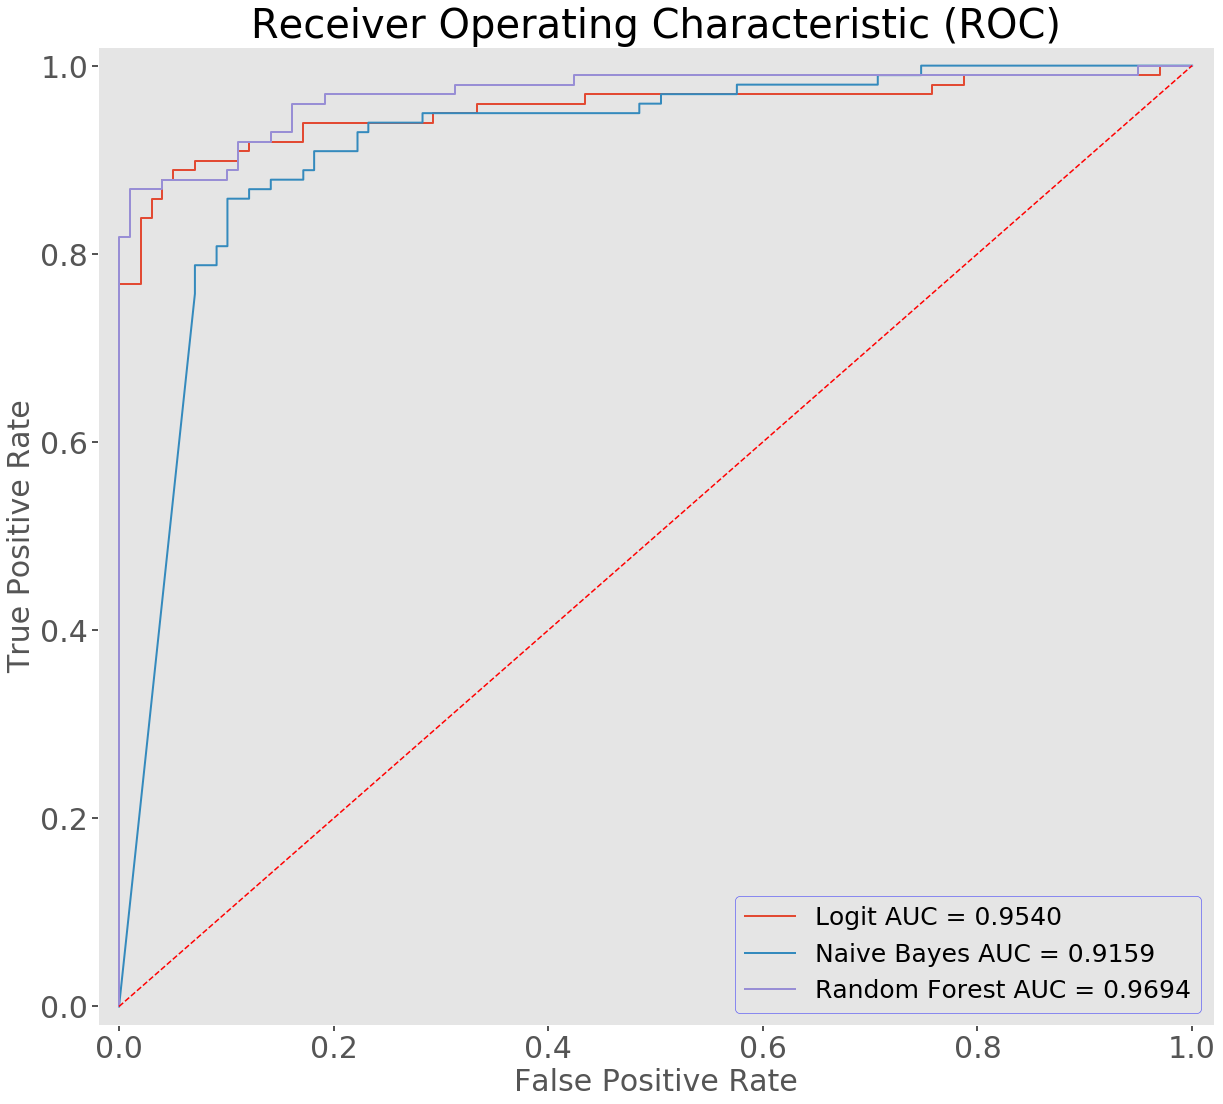

In [32]:
#in sample
roc_scores(X_val_under,y_val_under)


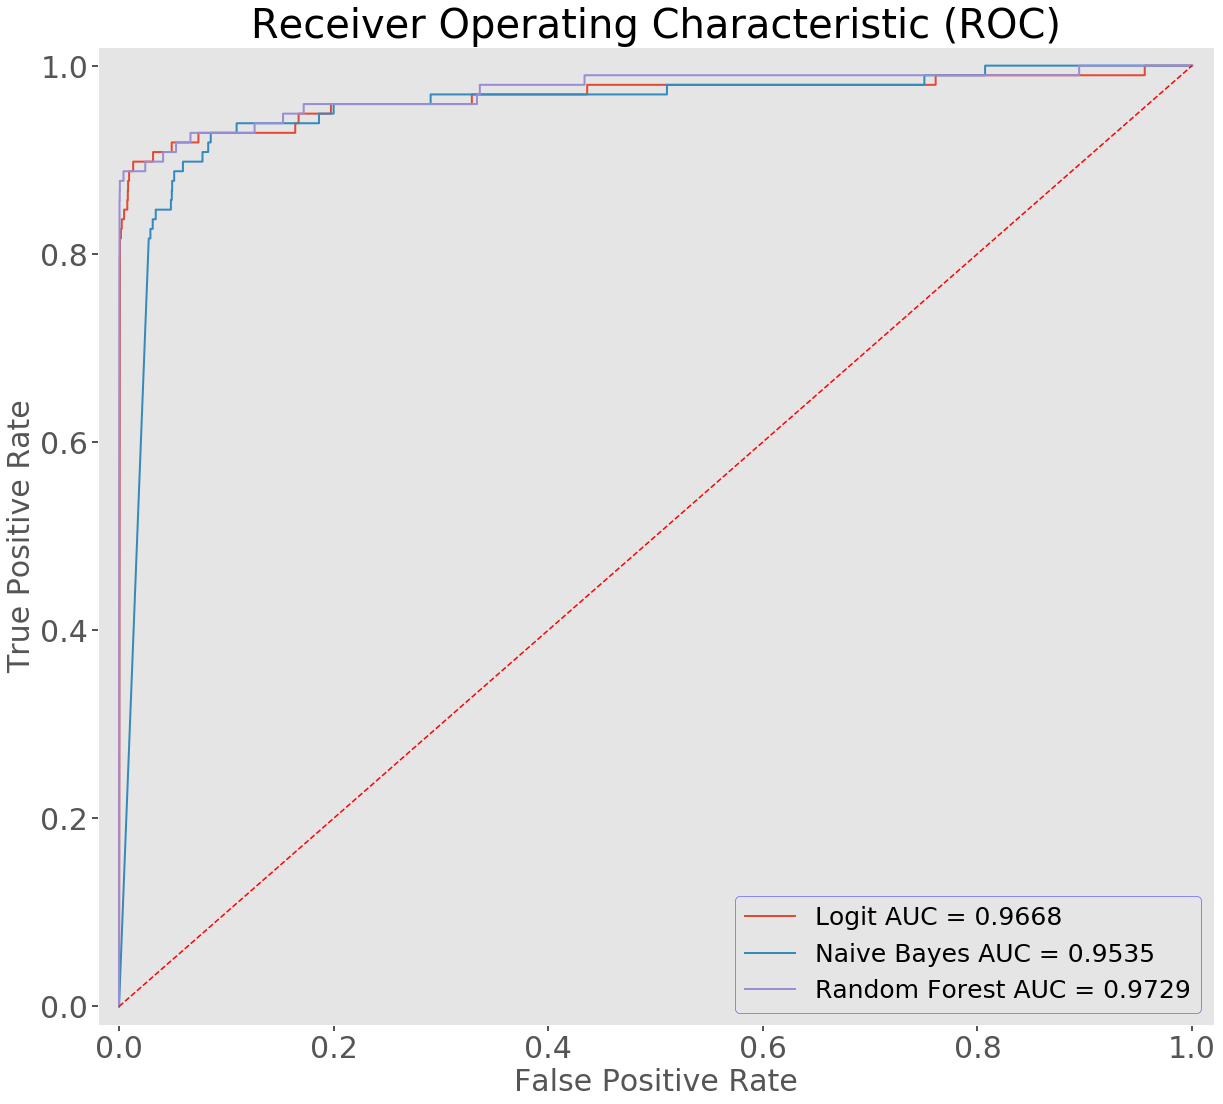

In [33]:
#out of sample
roc_scores(X_test_std,y_test)

# Finding the threshold

In [35]:

def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold) 
        f1 = f1_score(y_val_under,y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [36]:

models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,20)
#     print(f'Results for {name}:')
#     print('Best Threshold: ', best_thresh)
#     print('Highest_f1: ', high_f1)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

In [37]:
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])

In [38]:
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.842,0.917,0.919,0.889,0.946
1,Naive-Bayes,0.053,0.870,0.874,0.848,0.894
2,Random Forest,0.474,0.919,0.924,0.859,0.988


# Confusion Matrix

In [39]:
def make_confusion_matrix_val(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

findfont: Font family ['.SF Compact Display'] not found. Falling back to DejaVu Sans.


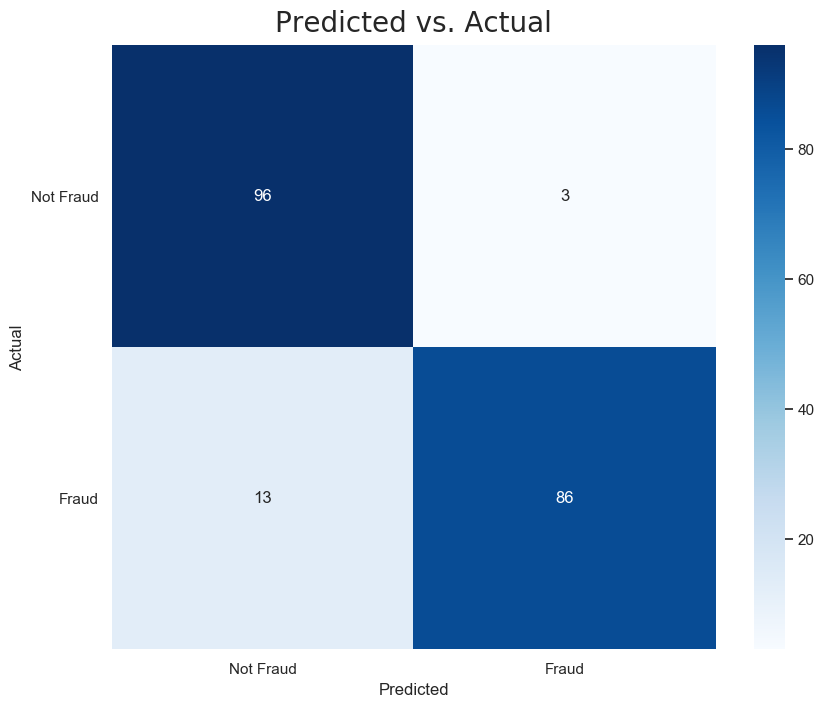

In [41]:

#fixed confusion matrix - random forest, validation
make_confusion_matrix_val(rf_grid, threshold=0.421)

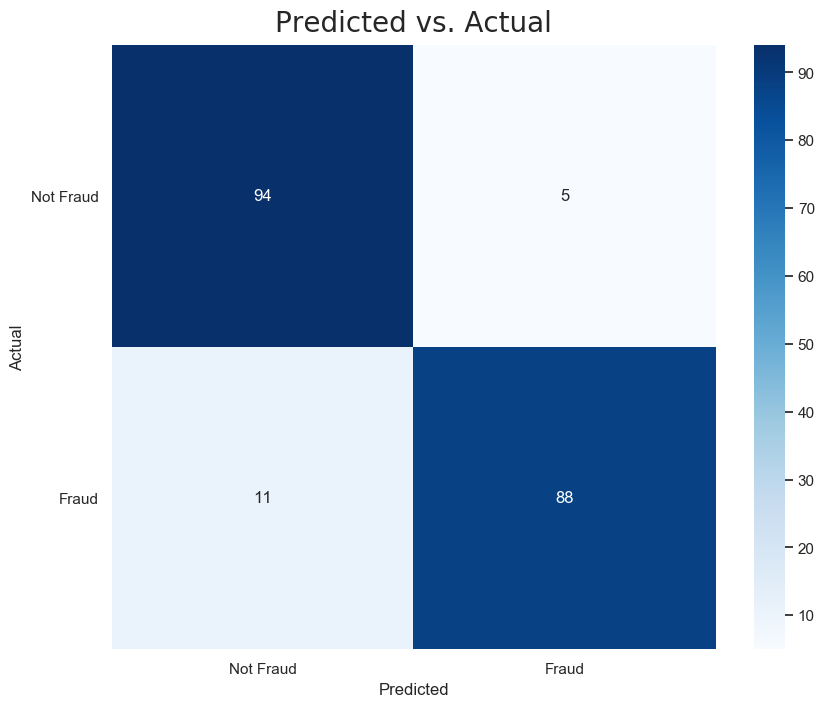

In [42]:
#fixed confusion matrix - logit, validation
make_confusion_matrix_val(logistic_grid, threshold=0.842)

In [43]:
def make_confusion_matrix_test(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

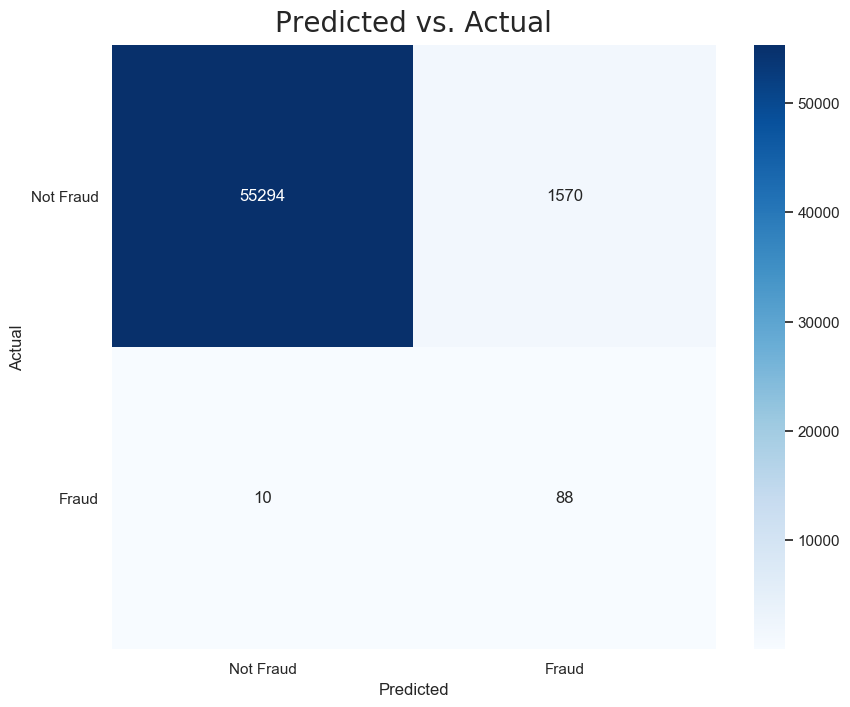

In [44]:
#fixed confusion matrix - random forest, test
make_confusion_matrix_test(rf_grid, threshold=0.421)

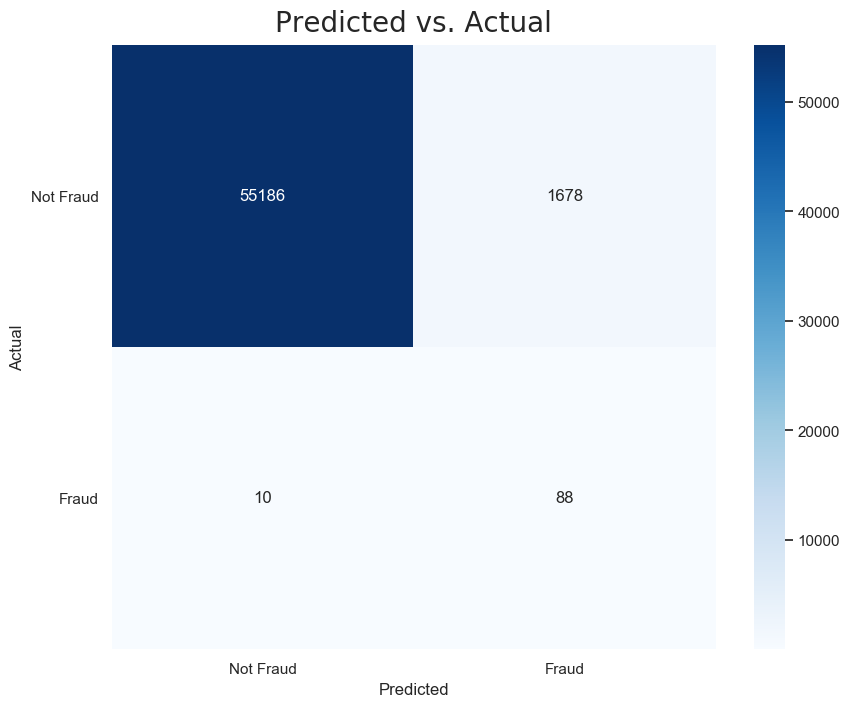

In [45]:

#fixed confusion matrix - logit, test
make_confusion_matrix_test(logistic_grid, threshold=0.842)